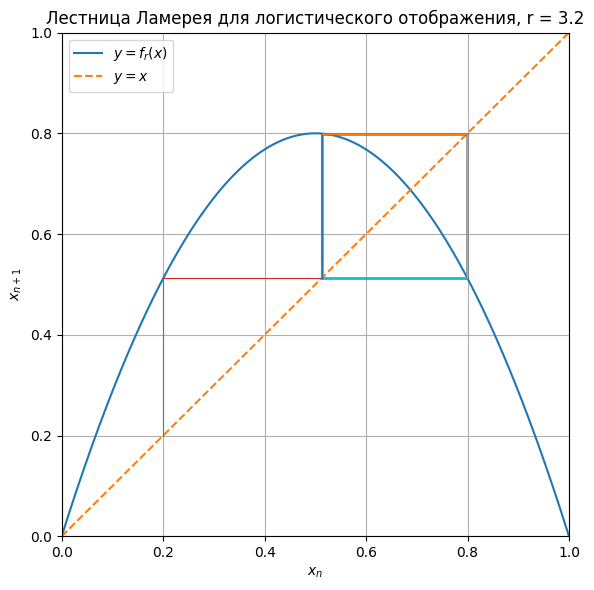

In [2]:
#Hard 2
import numpy as np
import matplotlib.pyplot as plt


def f(x, r):
    """
    Логистическое отображение: f_r(x) = r * x * (1 - x).
    """
    return r * x * (1 - x)


def lamerey_staircase(r=3.2, x0=0.2, n_iter=50):
    """
    Рисует лестницу Ламерея для логистического отображения x_{n+1} = f_r(x_n).

    r      – параметр отображения;
    x0     – начальное значение x_0;
    n_iter – число итераций (ступенек), которые нужно нарисовать.
    """
    # Сетка по оси x для графиков y = f_r(x) и y = x
    xs = np.linspace(0, 1, 400)

    # Рисуем график y = f_r(x) и диагональ y = x
    plt.figure(figsize=(6, 6))
    plt.plot(xs, f(xs, r), label=r"$y=f_r(x)$")
    plt.plot(xs, xs, linestyle="--", label=r"$y=x$")

    # Рисуем лестницу Ламерея
    x = x0
    y = x0  # начинаем с точки (x0, x0) на диагонали y = x
    for _ in range(n_iter):
        fx = f(x, r)

        # Вертикальный шаг: (x, y) → (x, f(x))
        plt.plot([x, x], [y, fx], linewidth=0.8)

        # Горизонтальный шаг: (x, f(x)) → (f(x), f(x))
        plt.plot([x, fx], [fx, fx], linewidth=0.8)

        # Обновляем текущую точку: следующий x_n = f(x_n)
        x = fx
        y = fx

    # Ограничиваем область отображения
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    # Подписи осей и заголовок
    plt.xlabel(r"$x_n$")
    plt.ylabel(r"$x_{n+1}$")
    plt.title(fr"Лестница Ламерея для логистического отображения, r = {r}")

    # Включаем сетку и легенду
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Точка входа: вызываем функцию, чтобы сразу получить рисунок
if __name__ == "__main__":
    lamerey_staircase(r=3.2, x0=0.2, n_iter=50)

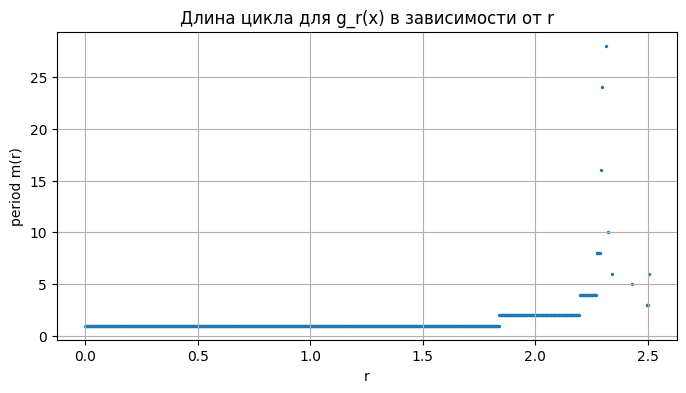

In [1]:
#Hard 3
import numpy as np
import matplotlib.pyplot as plt

def g(x, r):
    return r * x * (1 - x) * (2 - x)

def iterate_map(r, x0=0.2, n_transient=2000, n_collect=500):
    x = x0
    for _ in range(n_transient):
        x = g(x, r)
    xs = []
    for _ in range(n_collect):
        x = g(x, r)
        xs.append(x)
    return np.array(xs)

def detect_period(xs, max_period=32, tol=1e-6):
    ys = xs[-5*max_period:]
    n = len(ys)
    for p in range(1, max_period+1):
        ok = True
        for i in range(n - p):
            if abs(ys[i] - ys[i+p]) > tol:
                ok = False
                break
        if ok:
            return p
    return None

def period_vs_r():
    r_min, r_max = 0.0, 3*np.sqrt(3)/2
    rs = np.linspace(r_min, r_max, 800)
    periods = []

    for r in rs:
        xs = iterate_map(r)
        p = detect_period(xs, max_period=32)
        periods.append(np.nan if p is None else p)
    plt.figure(figsize=(8, 4))
    plt.scatter(rs, periods, s=2)
    plt.xlabel("r")
    plt.ylabel("period m(r)")
    plt.title("Длина цикла для g_r(x) в зависимости от r")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    period_vs_r()